In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime

import umap
import hdbscan

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#from scipy.cluster.hierarchy import dendrogram, linkage

from preprocess import *
from utils import *
import TemporalClusterer
import dCollector as dC


import sys
import os  

In [3]:
## Arguments

In [4]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

dataLoc='Z:\SECT'
tFrom='2020-02-15'
tTo='2020-02-15'
min_events=3
max_activity=0.7
dist_threshold=0.05

In [5]:
#Load preprocessed files
(df, file_list) = load_files(dataLoc, tFrom, tTo)

tc = TemporalClusterer.TemporalClusterer(min_events=min_events, max_activity=max_activity, dist_threshold=dist_threshold)

df['labels'] = tc.fit_transform(df, [])

(clusters, series) = tc.post_process(df, file_list)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017693168A58>,
      dtype=object)

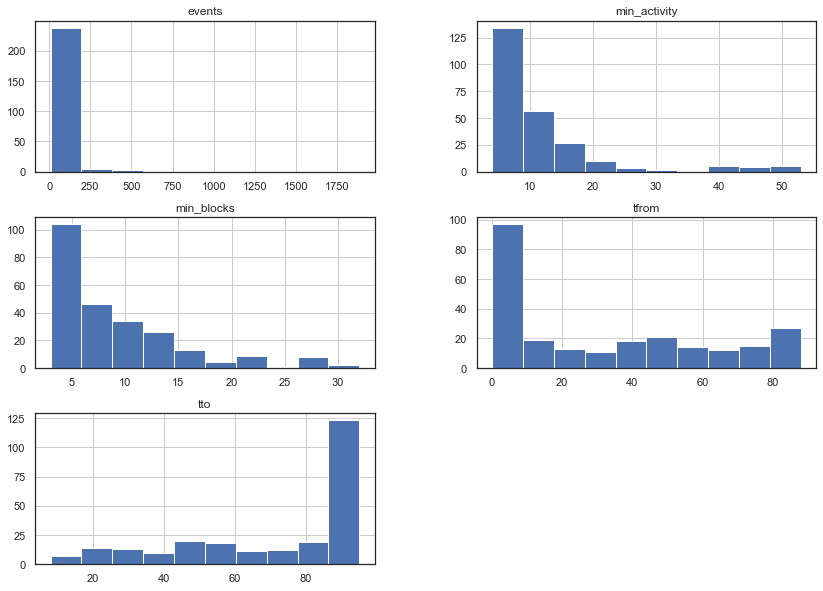

In [8]:
clusters[['events', 'min_activity', 'min_blocks', 'tfrom', 'tto', 'origins', 'types']]
clusters[['events', 'min_activity', 'min_blocks', 'tfrom', 'tto', 'origins', 'types']].hist()

In [9]:
clusters['ips']

labels
0      [223.93.140.130, 190.238.188.55, 60.12.5.27, 6...
1      [178.17.160.221, 178.17.160.229, 190.238.188.5...
2      [103.225.212.13, 180.182.234.15, 103.225.212.1...
3      [146.242.62.17, 146.242.62.21, 146.242.62.28, ...
4      [80.210.19.160, 208.100.32.121, 208.100.32.117...
                             ...                        
242    [58.177.174.150, 185.53.79.218, 185.53.79.196,...
243    [86.106.245.54, 178.176.160.130, 79.142.76.244...
244    [62.76.92.22, 178.46.90.111, 188.254.99.98, 21...
245    [213.159.206.66, 212.118.18.210, 79.123.156.21...
246    [81.95.32.138, 212.118.18.204, 5.2.24.17, 192....
Name: ips, Length: 247, dtype: object

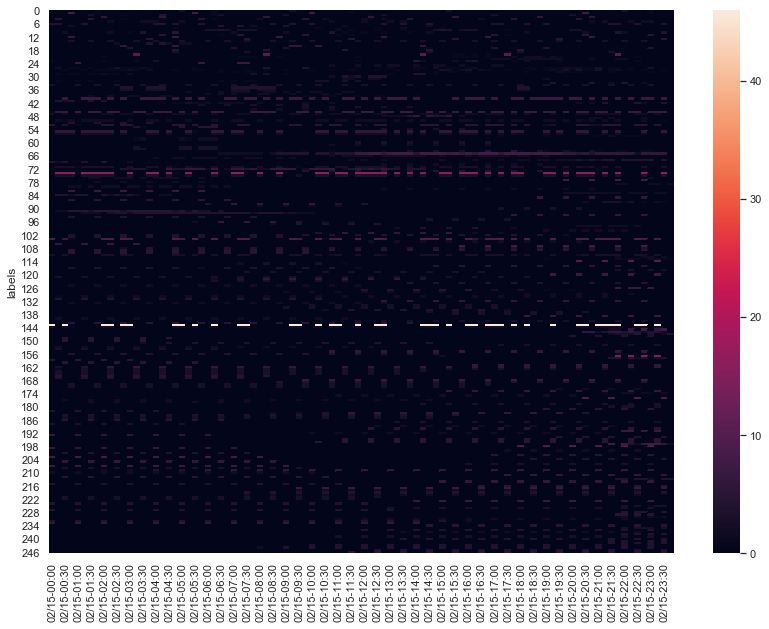

In [10]:
sns.heatmap(series.apply(lambda x: np.multiply(x,clusters['size']),axis=0))

In [11]:
max=clusters.loc[clusters['size']==clusters['size'].max(),:].head(1)

intervals = sample_intervals(series.loc[max.index,:],file_list[0],tc.aggregation)

benefizio = dC.dc()
res=benefizio.filterFlows(clusters.loc[max.index,'ips'].apply(dC.dc_liberouter_filter_string).values[0], 
                        intervals[0][0][0], intervals[0][0][1])

/usr/bin/id: cannot find name for group ID 10000
/usr/bin/id: cannot find name for group ID 10000
/usr/bin/id: cannot find name for group ID 10000
.reading files: 14/432 (3 %) ...reading files: 16/432 (3 %) ...reading files: 18/432 (4 %) ...reading files: 20/432 (4 %) ...reading files: 22/432 (5 %) ...reading files: 24/432 (5 %) ...reading files: 26/432 (6 %) ...reading files: 28/432 (6 %) ...reading files: 30/432 (6 %) ...reading files: 32/432 (7 %) ...reading files: 34/432 (7 %) ...reading files: 36/432 (8 %) ...reading files: 38/432 (8 %) ...reading files: 40/432 (9 %) ...reading files: 42/432 (9 %) ...reading files: 44/432 (10 %) ...reading files: 46/432 (10 %) ...reading files: 48/432 (11 %) ...reading files: 50/432 (11 %) ...reading files: 52/432 (12 %) ...reading files: 54/432 (12 %) ...reading files: 56/432 (12 %) ...reading files: 58/432 (13 %) ...reading files: 60/432 (13 %) ...reading files: 62/432 (14 %) ...reading files: 64/432 (14 %) ...reading files: 66/432 (15 %) ...rea

first,packets,bytes,srcip,dstip,srcport,dstport,proto,flags
1581731406323,10,920,104.41.9.60,147.213.134.1,0,0,ICMP,........
1581731403498,10,920,104.41.9.60,158.195.107.1,0,0,ICMP,........
1581731412411,10,920,104.41.9.60,158.193.18.1,0,0,ICMP,........
1581731413810,10,920,104.41.9.60,147.232.44.1,0,0,ICMP,........
1581731402394,10,920,104.41.9.60,158.197.30.1,0,0,ICMP,........
1581731417565,10,920,104.41.9.60,193.87.103.1,0,0,ICMP,........
1581731405444,10,920,104.41.9.60,147.175.21.1,0,0,ICMP,........
1581731408540,10,920,104.41.9.60,158.195.79.1,0,0,ICMP,........
1581731408764,10,920,104.41.9.60,158.195.26.1,0,0,ICMP,........
1581731419917,10,920,104.41.9.60,158.197.47.1,0,0,ICMP,........
1581731406548,10,920,104.41.9.60,194.160.29.1,0,0,ICMP,........
1581731418437,10,920,104.41.9.60,158.193.219.1,0,0,ICMP,........
1581731417513,10,920,104.41.9.60,147.232.9.1,0,0,ICMP,........
1581731702317,10,920,104.41.9.60,147.232.74.1,0,0,ICMP,........
1581731700968,10,920,104.41.9.60,147.213.2

In [28]:
import plotly.graph_objects as go
import graphing 
#import importlib
#importlib.reload(graphing)

fig = go.Figure(graphing.genSankey(res.iloc[:1000,:],['srcip','proto'],'packets'))
fig.show()
